# Сводный групповой проект по исследовательскому и статистическому анализу биологических или медицинских данных

Имеется таблица данных пациентов с опухолями головного мозга.
Столбцы таблицы:
1. Tumor Type - категория опухоли: менингиома, глиома (астроцитома, олигодендроглиома, глиобластома) и эпендимома.
2. Location - расположение опухоли: затылочная доля (Occipital Lobe), ствол мозга (Brainstem), височная доля (Temporal Lobe), лобная доля (Frontal Lobe), мозжечок (Cerebellum) и париентальная доля (Parietal Lobe).
3. Size (cm) - размер опухоли, см.
4. Grade - градация опухолей мозга, включает четыре степени (в соответствии с классификацией ВОЗ, 2016): 
    * Grade I — нет ни одного из указанных признаков. Опухоль растёт медленно, имеет клетки, которые очень похожи на нормальные клетки, и редко распространяется на близлежащие ткани.
    * Grade II — есть один из признаков (как правило, атипия ядер, но допускаются и единичные митозы). Опухоль растёт медленно, но может распространиться на близлежащие ткани и может рецидивировать.
    * Grade III — в опухоли много митотических фигур. Опухоль растёт быстро, это может привести к распространению в близлежащие ткани, опухолевые клетки значительно отличаются от нормальных клеток.
    * Grade IV — выраженная пролиферация эндотелия сосудов и наличие некрозов. Опухоль растёт и распространяется очень быстро, клетки не похожи на нормальные клетки.
5. Patient Age - возраст пациента.
6. Gender - пол пациента.


Для выполнения проекта необходимо выполнть следущие шаги:
1. Откройте файл с данными и изучите общую информацию
2. Выполните предобработку данных: 
    * проверьте наличие пропущенных значений в столбцах таблицы, при необходимости устраните пропуски;
    * проверьте соотвествие типов данных в столбцах их содержимому;
    * изучите уникальные значения в столбцах, проверьте наличие опечаток.
3. Добавьте в таблицу новый столбец - возрастная группа пациента (для деления на возрастные группы воспользуйтесь классификацией Всемирной организации здравоохранения).
4. С использование сводных таблиц и/или срезов данных исследуйте:
    * медианный возраст мужчин и женщин с опухолями мозга;
    * количество мужчин и женщин разных возрастных групп;
    * медианный размер для разных категорий опухоли, раположения и градации;
    * какая категория опулохи преобладает в каждой возрастной группе у мужчин и женщин.
5. Постройте гистограммы распределения размеров опухолей для разных категорий опухоли, раположения и градации.
6. Постройте круговые диаграммы для категориальных признаков таблицы.
7. При помощи коэффициент $\phi_K$ из библиотеки phik оцениите связь между признаками (не забудьте указать параметр метода - `interval_cols`).
8. Проверьте статистичекие гипотезы:
    * различается ли средний возраст мужчин и женщин с опухолью головного мозга;
    * действительно ли глиобластомы чаще обнаруживаются у мужчин, чем у женщин;
    * действительно ли менингиомы чаще всречаются у детей (до 18 лет), чем у взрослых
9. Сделайте общий вывод по работе.

In [1]:
# в этой ячейке должен быть ваш код

## 1.Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
tum = pd.read_csv('brain_tumor.csv')

In [3]:
tum.head ()

,Tumor Type,Location,Size (cm),Grade,Patient Age,Gender
0,Oligodendroglioma,Occipital Lobe,9.23,I,48,Female
1,Ependymoma,Occipital Lobe,"0,87",II,47,Male
2,Meningioma,Occipital Lobe,2.33,II,12,Female
3,Ependymoma,Occipital Lobe,1.45,III,38,Female
4,Ependymoma,Brainstem,NaN,I,35,Female


In [4]:
tum.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tumor Type   1001 non-null   object
 1   Location     1001 non-null   object
 2   Size (cm)    1000 non-null   object
 3   Grade        1001 non-null   object
 4   Patient Age  1001 non-null   int64 
 5   Gender       1001 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## 2. Выполните предобработку данных: 

### *проверьте наличие пропущенных значений в столбцах таблицы, при необходимости устраните пропуски;

In [5]:
tum.isna().sum()

Tumor Type     0
Location       0
Size (cm)      1
Grade          0
Patient Age    0
Gender         0
dtype: int64

In [6]:
tum.dropna(inplace = True)

In [7]:
tum.isna().sum()

Tumor Type     0
Location       0
Size (cm)      0
Grade          0
Patient Age    0
Gender         0
dtype: int64

### * проверьте соотвествие типов данных в столбцах их содержимому;

In [8]:
tum['Size (cm)'] = (tum['Size (cm)'].
                                            str.replace ('%', '').
                                            str.replace (',', '.').
                                            astype(float)
                                             )

In [9]:
tum.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


### * изучите уникальные значения в столбцах, проверьте наличие опечаток.

In [10]:
values = tum['Tumor Type'].unique()
values

array(['Oligodendroglioma', 'Ependymoma', 'Meningioma', 'Astrocytoma',
       'Glioblastoma'], dtype=object)

In [11]:
values = tum['Location'].unique()
values

array(['Occipital Lobe', 'Brainstem', 'Temporal Lobe', 'Frontal Lobe',
       'Cerebellum', 'Parietal Lobe', 'Brainstam'], dtype=object)

In [12]:
values = tum['Grade'].unique()
values

array(['I', 'II', 'III', 'IV'], dtype=object)

In [13]:
values = tum['Gender'].unique()
values

array(['Female', 'Male', 'Woman', 'Man', 'Women'], dtype=object)

In [14]:
tum['Gender'].replace('Woman', 'Female', inplace = True)
tum['Gender'].replace('Women', 'Female', inplace = True)
tum['Gender'].replace('Man', 'Male', inplace = True)

In [15]:
values = tum['Gender']
values

0       Female
1         Male
2       Female
3       Female
5         Male
         ...  
996     Female
997     Female
998     Female
999     Female
1000    Female
Name: Gender, Length: 1000, dtype: object

## 3. Добавьте в таблицу новый столбец - возрастная группа пациента (для деления на возрастные группы воспользуйтесь классификацией Всемирной организации здравоохранения).

In [16]:
import numpy as np

In [17]:
years_old = [
    (tum['Patient Age'] < 18),
    (tum['Patient Age'] >= 18) & (tum['Patient Age'] <= 44),
    (tum['Patient Age'] >= 45) & (tum['Patient Age'] <= 59),
    (tum['Patient Age'] >= 60) & (tum['Patient Age'] <= 74),
    (tum['Patient Age'] >= 75) & (tum['Patient Age'] <= 90),
    (tum['Patient Age'] > 90)]

names = ['juveniles', 'young people' , 'middle-aged people', 'elderly age', 'senile age', 'longevity']

tum['AgeGroup'] = np.select(years_old,names)

In [18]:
tum.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
 6   AgeGroup     1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 62.5+ KB


## 4.С использованием сводных таблиц и/или срезов данных исследуйте:

### * медианный возраст мужчин и женщин с опухолями мозга;

In [19]:
tum.pivot_table(index=['Gender'], values=['Patient Age'], aggfunc=np.median)

,Patient Age
Gender,
Female,42.0
Male,44.5


### * количество мужчин и женщин разных возрастных групп;

In [20]:
table1 = tum.groupby(['Gender', 'AgeGroup']).size().reset_index(name='Count')
table1

,Gender,AgeGroup,Count
0,Female,elderly age,83
1,Female,juveniles,99
2,Female,middle-aged people,82
3,Female,senile age,68
4,Female,young people,154
5,Male,elderly age,85
6,Male,juveniles,105
7,Male,middle-aged people,103
8,Male,senile age,69
9,Male,young people,152


### * медианный размер для разных категорий опухоли, раположения и градации;

In [21]:
tum.pivot_table(index=['Tumor Type', 'Location'], columns=['Grade'], values = ['Size (cm)'], aggfunc=np.median)

Size (cm)                     
Grade                                    I     II    III     IV
Tumor Type        Location                                     
Astrocytoma       Brainstem          2.630  6.810  7.030  6.920
                  Cerebellum         5.715  3.560  4.295  3.860
                  Frontal Lobe       4.360  4.110  3.970  2.510
                  Occipital Lobe     6.610  3.630  5.050  3.700
                  Parietal Lobe      5.800  5.230  6.770  4.990
                  Temporal Lobe      4.500  6.550  7.485  7.400
Ependymoma        Brainstam          6.450    NaN    NaN    NaN
                  Brainstem          5.540  2.300  7.140  3.740
                  Cerebellum         5.760  2.610  7.170  2.240
                  Frontal Lobe       2.190  6.190  5.910  6.900
                  Occipital Lobe     5.435  1.460  5.240  4.620
                  Parietal Lobe      6.520  5.240  4.485  3.200
                  Temporal Lobe      7.370  4.570  8.230  1.930
Glioblastoma      Brainstem          4.860  6.380  5.745  5.380
                  Cerebellum         4.610  5.695  1.190  5.830
                  Frontal Lobe       7.740  1.340  2.500  6.770
                  Occipital Lobe     3.820  6.295  9.320  4.690
                  Parietal Lobe      4.460  5.570  6.370  4.090
                  Temporal Lobe      6.495  8.570  4.985  5.240
Meningioma        Brainstem          5.435  4.030  4.610  6.550
                  Cerebellum         5.880  3.270  4.320  3.810
                  Frontal Lobe       5.900  7.730  9.015  2.700
                  Occipital Lobe     3.470  5.260  7.345  5.185
                  Parietal Lobe      6.110  2.870  3.560  7.360
                  Temporal Lobe      6.935  6.545  3.130  8.480
Oligodendroglioma Brainstem          2.850  5.330  4.930  6.800
                  Cerebellum         4.030  5.195  4.320  7.665
                  Frontal Lobe       3.975  5.890  4.980  4.960
                  Occipital Lobe     5.640  6.650  4.520  2.350
                  Parietal Lobe      3.985  4.400  5.720  7.300
                  Temporal Lobe      6.060  4.580  5.270  6.260

### * какая категория опулохи преобладает в каждой возрастной группе у мужчин и женщин.

In [22]:
tum.pivot_table(index=['Gender', 'AgeGroup'], values=['Tumor Type'], aggfunc= np.max)

Tumor Type
Gender AgeGroup                             
Female elderly age         Oligodendroglioma
       juveniles           Oligodendroglioma
       middle-aged people  Oligodendroglioma
       senile age          Oligodendroglioma
       young people        Oligodendroglioma
Male   elderly age         Oligodendroglioma
       juveniles           Oligodendroglioma
       middle-aged people  Oligodendroglioma
       senile age          Oligodendroglioma
       young people        Oligodendroglioma

## 5. Постройте гистограммы распределения размеров опухолей для разных категорий опухоли, раположения и градации.

### СВОДНАЯ

/tmp/ipykernel_1883939/259017521.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(labels = ['Oligodendroglioma', 'Ependymoma', 'Meningioma', 'Astrocytoma',
/tmp/ipykernel_1883939/259017521.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(labels = ['Occipital Lobe', 'Brainstem', 'Temporal Lobe', 'Frontal Lobe',
/tmp/ipykernel_1883939/259017521.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(labels = ['I', 'II', 'III', 'IV'])


[Text(0.5, 0, '')]

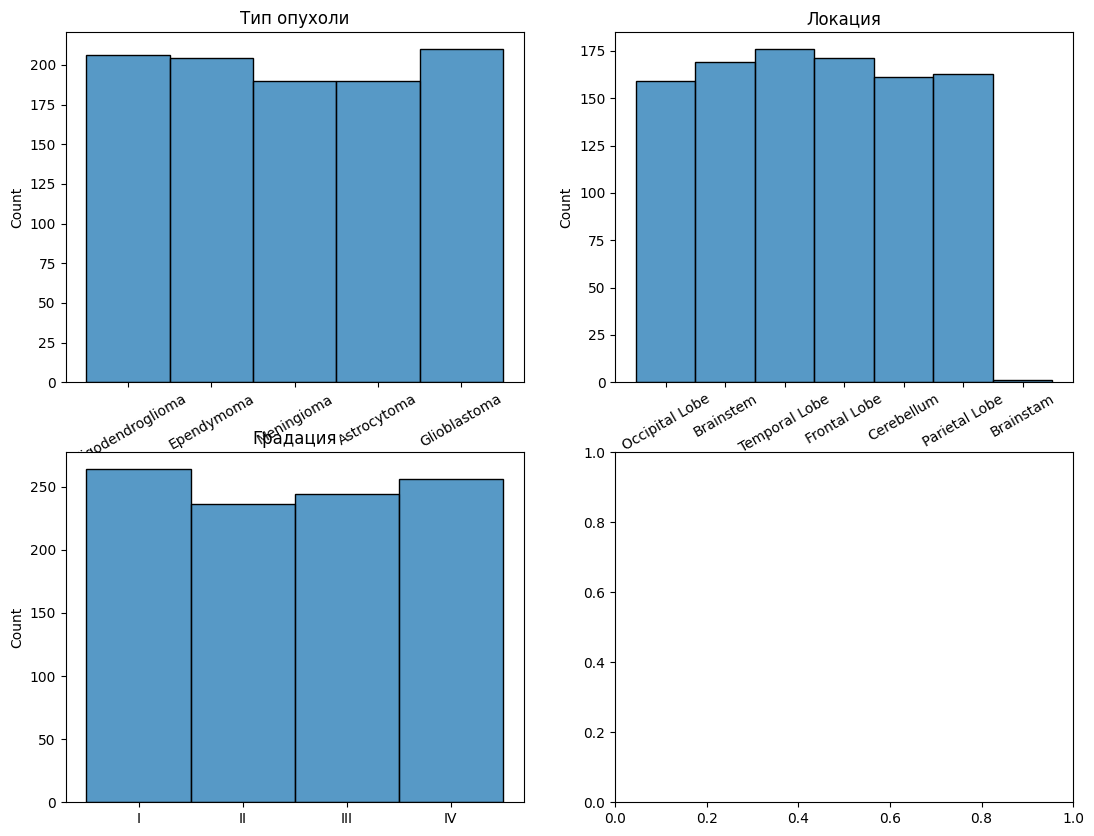

In [23]:
import  matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
ax[0,0] = sns.histplot(ax=ax[0,0], x = tum['Tumor Type'])
ax[0,1] = sns.histplot(ax=ax[0,1], x = tum['Location'])
ax[1,0] = sns.histplot(ax=ax[1,0], x = tum['Grade'])

ax[0,0].set_title('Тип опухоли')
ax[0,1].set_title('Локация')
ax[1,0].set_title('Градация')

ax[0,0].set_xticklabels(labels = ['Oligodendroglioma', 'Ependymoma', 'Meningioma', 'Astrocytoma',
       'Glioblastoma'], rotation=30)
ax[0,1].set_xticklabels(labels = ['Occipital Lobe', 'Brainstem', 'Temporal Lobe', 'Frontal Lobe',
       'Cerebellum', 'Parietal Lobe', 'Brainstam'] , rotation=30)
ax[1,0].set_xticklabels(labels = ['I', 'II', 'III', 'IV'])

ax[1,0].set(xlabel = '') # пустые кавычки удаляют подпись по оси (!)
ax[0,1].set(xlabel = '')
ax[1,0].set(xlabel = '')


## 6. Постройте круговые диаграммы для категориальных признаков таблицы.

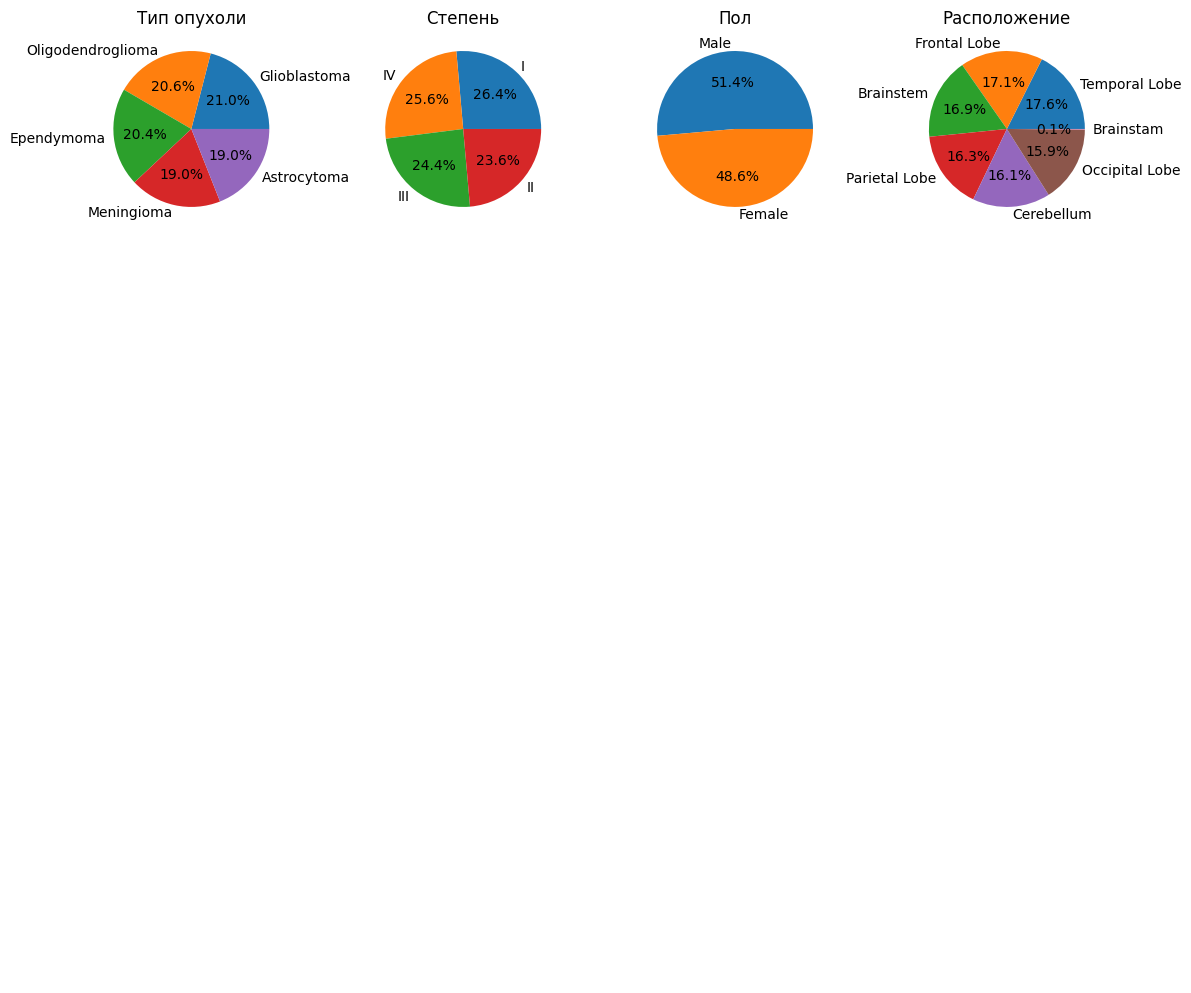

In [24]:
tt = tum['Tumor Type'].value_counts().to_dict()
lo =  tum['Location'].value_counts().to_dict()
gr = tum['Grade'].value_counts().to_dict()
hi = tum['Gender'].value_counts().to_dict()


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,12))
axes=axes.flatten()

axes[0].pie(tt.values(), labels = tt.keys(), autopct='%1.1f%%')
axes[0].set_title('Тип опухоли')

axes[1].pie(gr.values(), labels = gr.keys(), autopct='%1.1f%%')
axes[1].set_title('Степень')

axes[2].pie(hi.values(), labels = hi.keys(), autopct = '%1.1f%%')
axes[2].set_title('Пол')

axes[3].pie(lo.values(), labels = lo.keys(), autopct='%1.1f%%')
axes[3].set_title('Расположение')

for i in range(3,len (axes)):
    axes [i].axis('off')

plt.tight_layout()
plt.show()

## 7. При помощи коэффициент $\phi_K$ из библиотеки phik оцениите связь между признаками (не забудьте указать параметр метода - `interval_cols`)

In [25]:
!pip install phik

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [26]:
from phik.report import plot_correlation_matrix

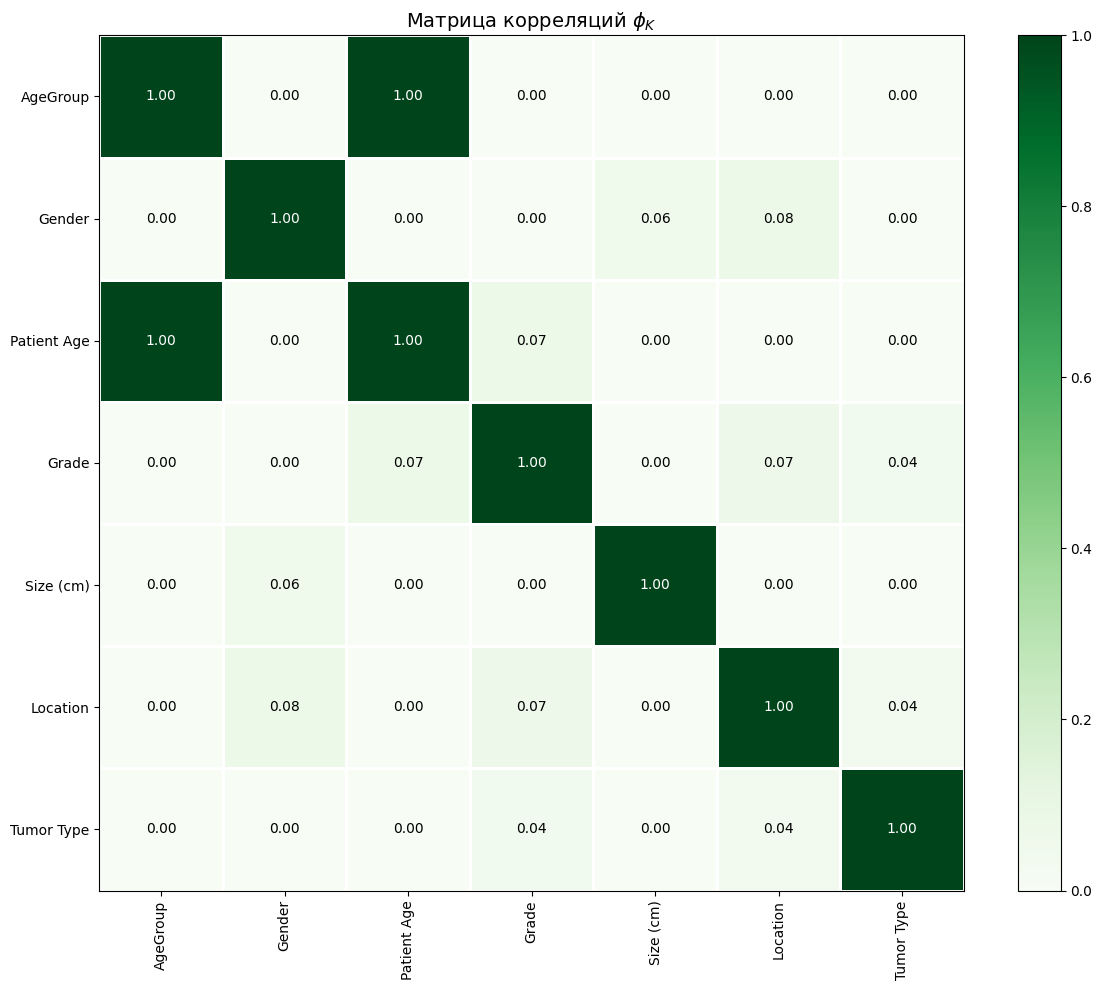

In [27]:
interval_cols = tum.select_dtypes(include = 'number').columns.tolist()
phik_overview = tum.phik_matrix(interval_cols = interval_cols, njobs=1)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Матрица корреляций $\phi_K$",
                        fontsize_factor=1,
                        figsize=(12, 10))
plt.tight_layout()

## 8. Проверьте статистичеcкие гипотезы:

### * различается ли средний возраст мужчин и женщин с опухолью головного мозга;

In [28]:
import scipy.stats as stats

In [29]:
# Нулевая гипотеза: различия среднего возраста мужчин и женщин значимы
#Альтернативная гипотеза: различия среднего возраста мужчин и женщин не значимы
CrosstabResult=pd.crosstab(index=tum['Gender'], columns=tum['Patient Age'])
print(CrosstabResult)

Patient Age  1   2   3   4   5   6   7   8   9   10  ...  80  81  82  83  84  \
Gender                                               ...                       
Female        5   4   1   7  10   6   2   2   6   6  ...   7   1   3   5   5   
Male          2   4   4  10   9   4  10   4   6  10  ...   3   4   4   3   8   

Patient Age  85  86  87  88  89  
Gender                           
Female        4   3   7   2   5  
Male          4   1  10   6   2  

[2 rows x 89 columns]


In [30]:
statistic, p, dof, expected = stats.chi2_contingency(CrosstabResult)
print('\033[4m'+ '\033[1m' + '\033[94m' + 'Значение статистики хи-квадрат равно {:.2f}'.format(statistic) + '\033[0m')
print('\033[4m'+ '\033[1m' + '\033[94m' + 'P-значение равно {:.2f}'.format(p) + '\033[0m')

Значение статистики хи-квадрат равно 89.12
P-значение равно 0.45


In [31]:
if p < 0.05:  
    print("Различия среднего возраста мужчин и женщин не значимы")  
else:  
    print("Принимаем нулевую гипотезу: различия среднего возраста мужчин и женщин значимы")

Принимаем нулевую гипотезу: различия среднего возраста мужчин и женщин значимы


### * действительно ли глиобластомы чаще обнаруживаются у мужчин, чем у женщин;

In [32]:
# Нулевая гипотеза: глиобластомы чаще обнаруживаются у мужчин, чем у женщин
#Альтернативная гипотеза: глиобластомы чаще не обнаруживаются у мужчин, чем у женщин;

In [34]:
CrosstabResult1=pd.crosstab(index=tum['Gender'], columns=tum['Tumor Type'])
print(CrosstabResult1)

Tumor Type  Astrocytoma  Ependymoma  Glioblastoma  Meningioma  \
Gender                                                          
Female               93          93           104          99   
Male                 97         111           106          91   

Tumor Type  Oligodendroglioma  
Gender                         
Female                     97  
Male                      109  


In [35]:
tum.rename(columns= {'Tumor Type':'Tumor_Type'}, inplace=True)

In [36]:
group1 = tum.query('Gender == "Male" and Tumor_Type == "Glioblastoma"')
group1

,Tumor_Type,Location,Size (cm),Grade,Patient Age,Gender,AgeGroup
18,Glioblastoma,Frontal Lobe,9.64,II,42,Male,young people
23,Glioblastoma,Cerebellum,0.97,I,31,Male,young people
24,Glioblastoma,Occipital Lobe,3.82,I,15,Male,juveniles
33,Glioblastoma,Frontal Lobe,5.82,IV,70,Male,elderly age
41,Glioblastoma,Occipital Lobe,9.39,III,47,Male,middle-aged people
...,...,...,...,...,...,...,...
928,Glioblastoma,Frontal Lobe,7.36,IV,34,Male,young people
931,Glioblastoma,Occipital Lobe,2.74,I,10,Male,juveniles
935,Glioblastoma,Brainstem,6.46,II,52,Male,middle-aged people
949,Glioblastoma,Brainstem,4.54,I,26,Male,young people


In [37]:
group2 = tum.query('Gender == "Female" and Tumor_Type == "Glioblastoma"')
group2

,Tumor_Type,Location,Size (cm),Grade,Patient Age,Gender,AgeGroup
38,Glioblastoma,Temporal Lobe,6.10,III,69,Female,elderly age
45,Glioblastoma,Cerebellum,6.31,IV,66,Female,elderly age
70,Glioblastoma,Brainstem,2.11,IV,43,Female,young people
81,Glioblastoma,Frontal Lobe,1.34,II,13,Female,juveniles
84,Glioblastoma,Cerebellum,4.98,I,85,Female,senile age
...,...,...,...,...,...,...,...
954,Glioblastoma,Parietal Lobe,7.72,III,2,Female,juveniles
955,Glioblastoma,Cerebellum,1.19,III,79,Female,senile age
959,Glioblastoma,Brainstem,6.35,I,63,Female,elderly age
996,Glioblastoma,Temporal Lobe,7.69,I,42,Female,young people


In [38]:
statistic, p, dof, expected = stats.chi2_contingency(CrosstabResult1)
print('\033[4m'+ '\033[1m' + '\033[94m' + 'Значение статистики хи-квадрат равно {:.2f}'.format(statistic) + '\033[0m')
print('\033[4m'+ '\033[1m' + '\033[94m' + 'P-значение равно {:.2f}'.format(p) + '\033[0m')

Значение статистики хи-квадрат равно 1.94
P-значение равно 0.75


In [39]:
if p < 0.05:  
    print("глиобластомы чаще не обнаруживаются у мужчин, чем у женщин")  
else:  
    print("глиобластомы чаще обнаруживаются у мужчин, чем у женщин")

глиобластомы чаще обнаруживаются у мужчин, чем у женщин


### * действительно ли менингиомы чаще всречаются у детей (до 18 лет), чем у взрослых

In [40]:
# Нулевая гипотеза: менингиомы чаще всречаются у детей
#Альтернативная гипотеза: менингиомы всречаются у детей не чаще

In [41]:
CrosstabResult2=pd.crosstab(index=tum['AgeGroup'], columns=tum['Tumor_Type'])
print(CrosstabResult2)

Tumor_Type          Astrocytoma  Ependymoma  Glioblastoma  Meningioma  \
AgeGroup                                                                
elderly age                  34          33            41          23   
juveniles                    42          38            43          38   
middle-aged people           39          34            42          38   
senile age                   23          31            23          32   
young people                 52          68            61          59   

Tumor_Type          Oligodendroglioma  
AgeGroup                               
elderly age                        37  
juveniles                          43  
middle-aged people                 32  
senile age                         28  
young people                       66  


In [42]:
statistic, p, dof, expected = stats.chi2_contingency(CrosstabResult2['Meningioma'])
print('\033[4m'+ '\033[1m' + '\033[94m' + 'Значение статистики хи-квадрат равно {:.2f}'.format(statistic) + '\033[0m')
print('\033[4m'+ '\033[1m' + '\033[94m' + 'P-значение равно {:.2f}'.format(p) + '\033[0m')

Значение статистики хи-квадрат равно 0.00
P-значение равно 1.00


In [43]:
if p < 0.05:  
    print("менингиомы всречаются у детей не чаще")  
else:  
    print("менингиомы чаще всречаются у детей")


менингиомы чаще всречаются у детей
